In [9]:
import os
import torch
from torch.utils.data import Dataset
import numpy as np

In [10]:
datapath = '../../data'

class prepareData_train(Dataset):
    def __init__(self, train_or_test):

       self.files = os.listdir(datapath+'/'+train_or_test)
       self.train_or_test= train_or_test

    def __len__(self):
       return len(self.files)

    def __getitem__(self, idx):
        
        data = torch.load(datapath+'/'+self.train_or_test+'/'+self.files[idx])
        return data['k-space'],  data['label']

In [11]:
traindata = prepareData_train('train')
valdata = prepareData_train('validation')
testdata = prepareData_train('test')

In [12]:
len(testdata)

8064

In [13]:
x = testdata[0]

In [14]:
np.array(x[0]).shape

(1, 2, 128, 10)

In [15]:
np.array(x[1]).shape

(1, 2, 128)

In [16]:
os.cpu_count()

8

In [17]:
mr = np.array(x[1])

In [18]:
np.squeeze(mr,axis=0)

array([[-7.28183794e+00, -1.25874197e+00,  8.55139017e-01,
        -9.32340908e+00,  2.17174530e+00, -4.68106699e+00,
        -1.40345888e+01,  2.96862960e+00, -3.39933825e+00,
         5.83791971e+00,  1.78139038e+01, -6.79797697e+00,
        -3.05093837e+00,  7.24245691e+00, -5.14511108e+00,
        -4.01253128e+00,  4.18960238e+00, -3.51627326e+00,
         9.63992476e-02,  2.42942371e+01, -3.08454657e+00,
        -3.01409793e+00,  1.51374025e+01, -6.57112646e+00,
         1.19205189e+01,  2.49361057e+01, -5.56577778e+00,
        -5.53549051e+00,  6.65765095e+00,  5.49000025e-01,
         6.17534399e+00, -5.08078003e+00,  1.12679424e+01,
         1.01475372e+01, -3.53816891e+00,  1.03081923e+01,
         1.47001915e+01,  6.80079126e+00, -8.14536214e-02,
         3.29909742e-01, -8.02751923e+00,  9.82582664e+00,
        -7.88930798e+00,  4.16557121e+00,  9.85974503e+00,
         2.22570953e+01,  8.89458752e+00, -9.91087151e+00,
         1.36642389e+01,  3.52543283e+00, -6.05209064e+0

In [19]:
mr = mr[0,:,:]

In [20]:
mr[0]

array([ -7.281838  ,  -1.258742  ,   0.855139  ,  -9.323409  ,
         2.1717453 ,  -4.681067  , -14.034589  ,   2.9686296 ,
        -3.3993382 ,   5.8379197 ,  17.813904  ,  -6.797977  ,
        -3.0509384 ,   7.242457  ,  -5.145111  ,  -4.0125313 ,
         4.1896024 ,  -3.5162733 ,   0.09639925,  24.294237  ,
        -3.0845466 ,  -3.014098  ,  15.137403  ,  -6.5711265 ,
        11.920519  ,  24.936106  ,  -5.565778  ,  -5.5354905 ,
         6.657651  ,   0.549     ,   6.175344  ,  -5.08078   ,
        11.267942  ,  10.147537  ,  -3.538169  ,  10.308192  ,
        14.7001915 ,   6.8007913 ,  -0.08145362,   0.32990974,
        -8.027519  ,   9.825827  ,  -7.889308  ,   4.165571  ,
         9.859745  ,  22.257095  ,   8.8945875 ,  -9.9108715 ,
        13.664239  ,   3.5254328 ,  -6.0520906 ,  -5.535214  ,
        15.4998    ,  -5.521236  ,   6.2291126 ,   4.276605  ,
        16.956953  ,  -8.510189  , -10.918353  , -31.955221  ,
        11.945093  ,  18.414951  ,   1.9134064 ,  49.38

In [21]:
import matplotlib.pyplot as plt

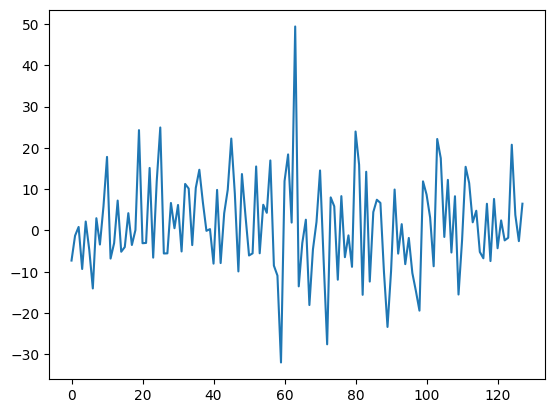

In [22]:
plt.plot(mr[0])

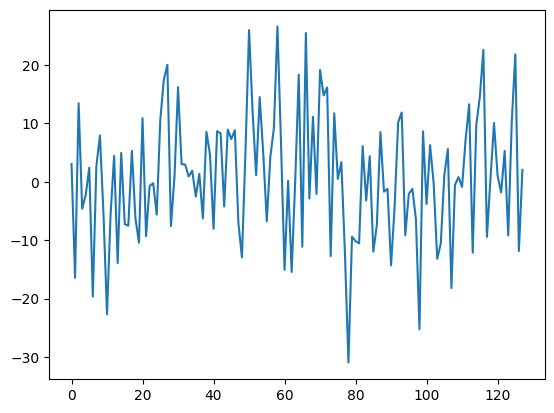

In [23]:
plt.plot(mr[1])

In [26]:
train_loss = [9.6301296307, 2.907290836, 2.6359478988, 2.4950579246, 2.5233743646, 2.3241917087, 2.2627709873, 2.1885851811, 2.1820310749, 2.1015635434, 2.0623132746, 2.0291116404, 2.0266836762, 1.9697899727, 1.9352416184, 1.9149487569, 1.9231789701, 1.8787368055, 1.8533901979, 1.8337239046]

val_loss = [3.204132193, 2.9397399708, 3.3979376492, 4.7104772957, 2.7505966299, 3.1139742732, 2.9028683054, 2.3948577391, 3.957996977, 2.8245945981, 2.2571943841, 2.385136689, 2.2993599427, 2.3720626047, 2.2604310764, 2.379661742, 2.4849749709, 2.2877304774, 2.1820692953, 2.243274466]

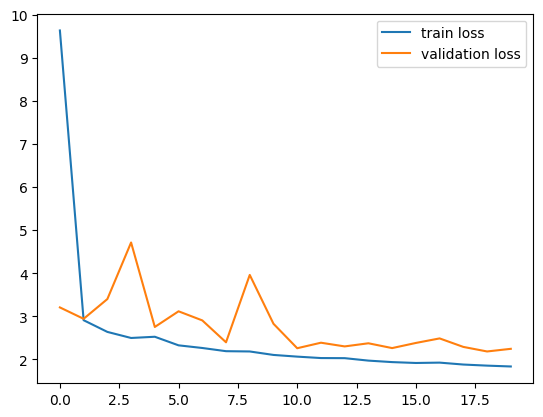

In [27]:
plt.plot(train_loss,label='train loss')
plt.plot(val_loss,label='validation loss')
plt.legend()
#plt.ylim(0,10)

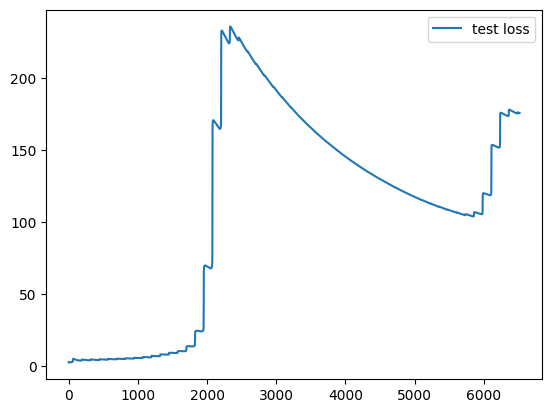

In [32]:
plt.plot(test_loss)
plt.legend(['test loss'])

In [33]:
len(test_loss)

6519

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

lab_path = '../../post/results/label.h5'
out_path = '../../post/results/output.h5'

label = h5py.File(lab_path, "r")
output = h5py.File(out_path, "r")


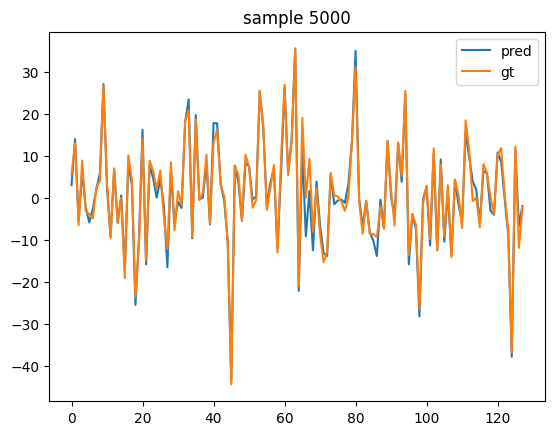

In [6]:
i = 5000

gt = np.array(label['k-space'])
#gt = np.mean(gt,axis=0)[1]
gt = gt[i,0,:,:]

pred = np.array(output['k-space'])
#pred = np.mean(pred,axis=0)[1]
pred = pred[i,0,:,:]

plt.plot(pred,label='pred')
plt.plot(gt,label='gt')
plt.legend()
plt.title(f'sample {i}');

Cool